# Standard Scaler

- Useful. when the feature follows a normal-like distribution, not so much otherwise
- Scales the feature to have zero mean and standard deviation of one, to give it a feel and properties of 'Standard' normal distribution.
- it does not perform well on features that have outliers.
- Does not change shape of distribution of feature.
- For each feature X, we calculate the mean (XM) and standard deviation (XS)
- for each value in that feature x (xi) calculate 
- new Xi = (Xi - Xm)/ Xs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [3]:
# fething inbuilt data from from sklearn
from sklearn.datasets import fetch_california_housing

In [4]:
# Want sklearn to fetch data i X & Y terms
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [5]:
X.shape

(20640, 8)

In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [9]:
# let's see our data Statistically
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


After seeing X, describe we came to conclusion that MedInc having the minimum 0.49 and maximum 15 which is just a short range whereas is in case of population minimum 3 and maximum is 35000.

Both of them are in different scales now. there fore there is a need to feature scaling if we are using knn or linear regression algos

In [10]:
# let's split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# showing that standard scale doesnot change the shape of distribution


In [21]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

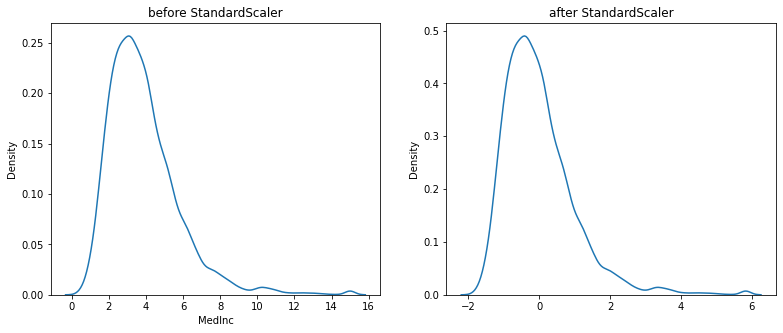

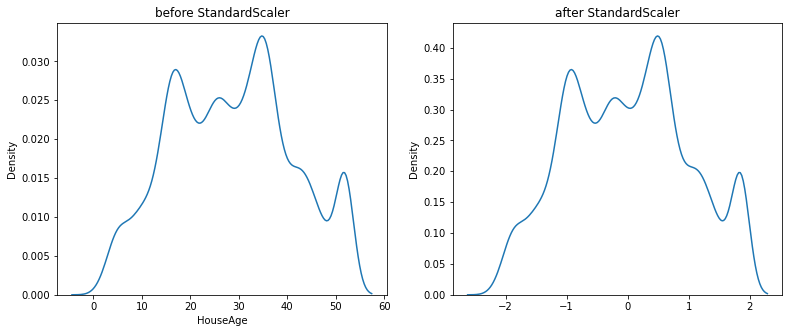

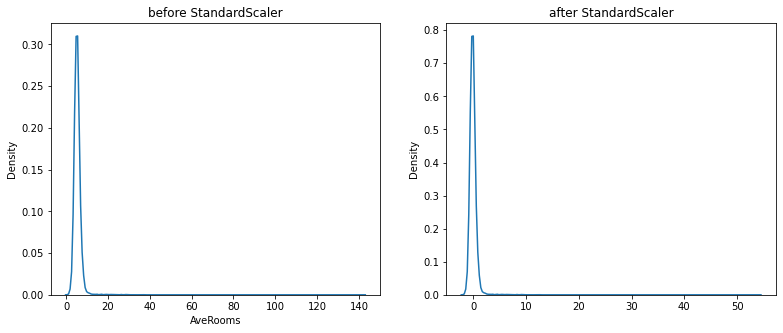

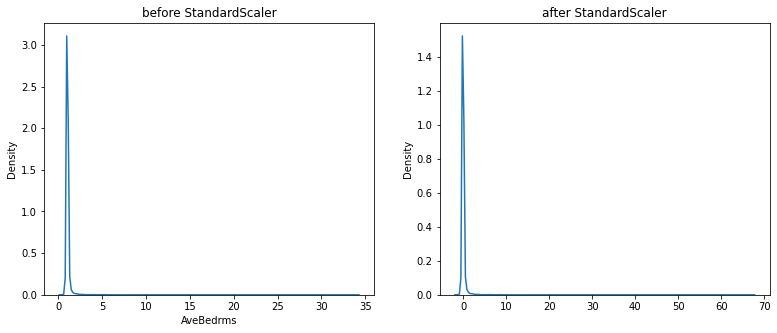

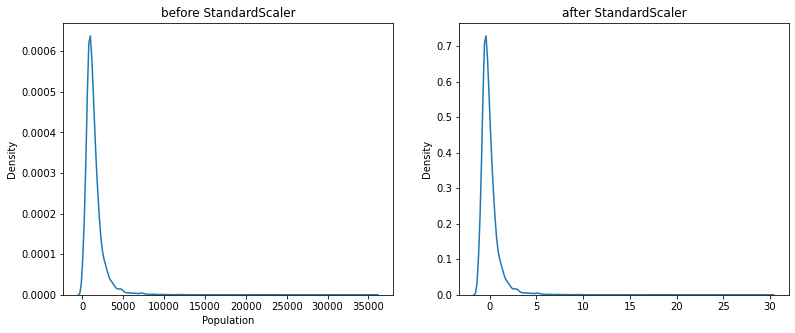

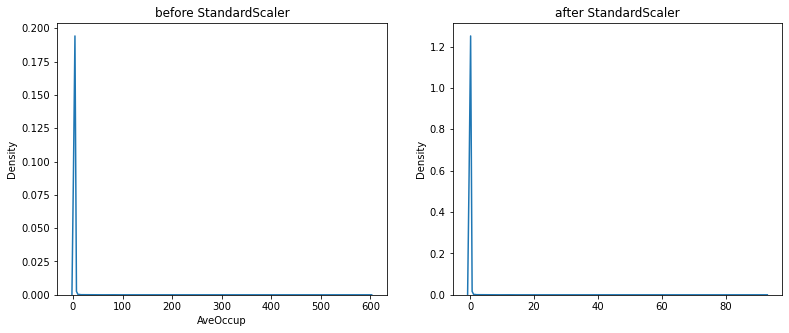

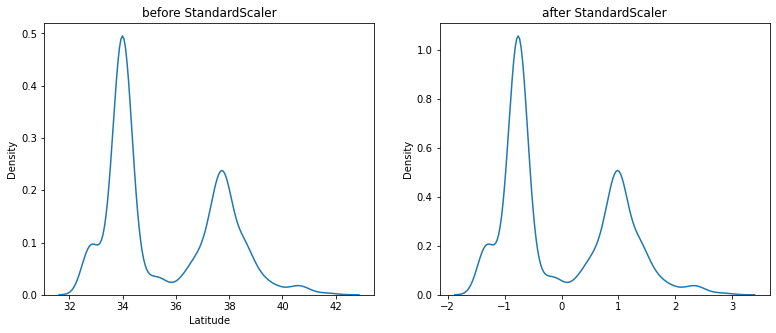

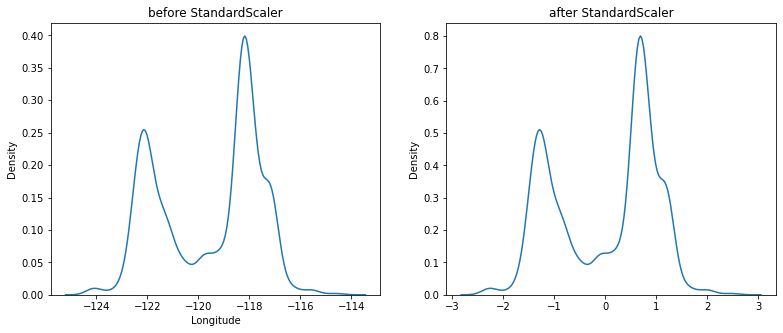

In [22]:
# X_train = df, var = col, t = standardScaler
for col in X_train.columns:
    plots(X_train, col, StandardScaler())

# Let's Check Accuracy on our Scaled and Unscaled data

In [25]:
# For scaled data

def model_accuracy_scaled(mod): #passed mod for tree based model
    model_scaled = Pipeline([('scale',StandardScaler()),('model',mod)])
    # Since this is scaled, let's standardize our data
    model_scaled.fit(X_train,y_train)
    return model_scaled.score(X_test,y_test)

# for unscaled data
def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([('model', mod)]) # no scaled argument passed
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [28]:
#accuracy on knn model
model_accuracy_scaled(KNeighborsRegressor())

0.6898252870009414

In [29]:
model_accuracy_unscaled(KNeighborsRegressor())

0.14312051440566032

In [30]:
# Accuracy on tree based models
model_accuracy_scaled(RandomForestRegressor(random_state=0))

0.7988302109542882

In [31]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.7986931773699132

In [32]:
# almost similar accuracy on descision based models, therefore of no use